# Chapter 7 Fourier Transform

## 7.3 Two-Dimensional Fourier Transform

### 7.3.1 Fast Fourier Transform using Python

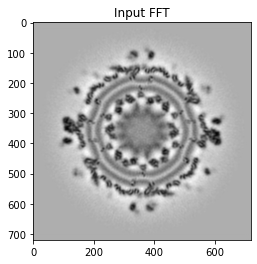

In [1]:
import cv2
import scipy.fftpack as fftim
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
imgplot = plt.title('Input FFT')
imgplot = plt.imshow(b,cmap='gray')


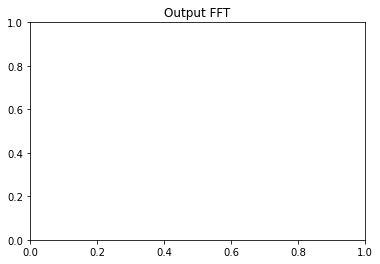

In [21]:
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Converting the d to floating type and saving it
# as fft1_output.raw in Figures folder.
d.astype('float').tofile('../Figures/fft1_output.raw')

plt.title('Output FFT')
plt.savefig('../Figures/fft1_output.raw')
plt.show()

## 7.5 Filtering in the Frequency Domain

### 7.5.1 Ideal Lowpass Filter

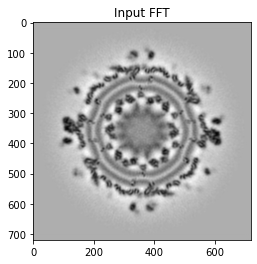

In [22]:
import cv2
import numpy, math
import matplotlib.pyplot as plt
import scipy.fftpack as fftim
from PIL import Image
#Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
imgplot = plt.title('Input FFT')
imgplot = plt.imshow(b,cmap='gray')

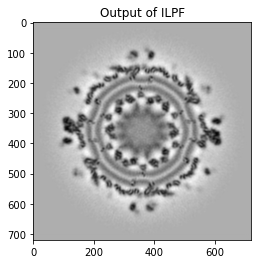

In [23]:
#Performing FFT.
c = fftim.fft2(b)
#Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to eliminate
        # high frequency.
        if r > d_0:
            H[i,j] = 0.0
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))


imgplot = plt.title('Output of ILPF')
imgplot = plt.imshow(b,cmap='gray')

### 7.5.2 Butterworth Lowpass Filter

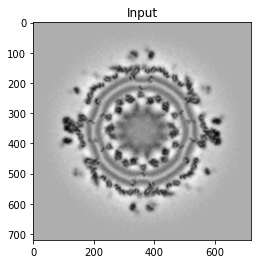

In [24]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')

imgplot = plt.title('Input')
imgplot = plt.imshow(b,cmap='gray')

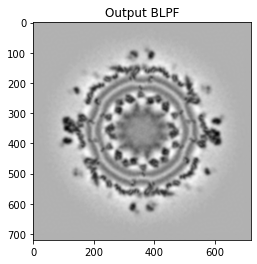

In [27]:
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 50.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1
# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t1)
            
# Converting H to an image
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Show
imgplot = plt.title('Output BLPF')
imgplot = plt.imshow(e,cmap='gray')

### 7.5.3 Gaussian Lowpass Filter

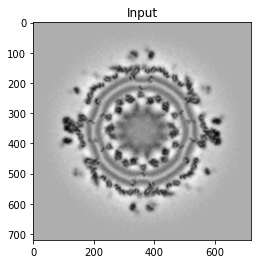

In [7]:
import numpy, math
import cv2
import scipy.fftpack as fftim
from PIL import Image
#Opening the image and converting it to grayscale.
b= Image.open('../Figures/fft1.png').convert('L')
# Show
imgplot = plt.title('Input')
imgplot = plt.imshow(b,cmap='gray')

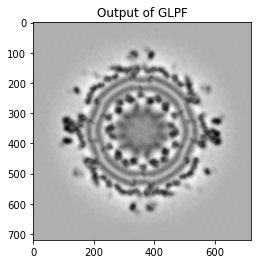

In [8]:
#Performing FFT.
c= fftim.fft2(b)
#Shifting the Fourier frequency image.
d= fftim.fftshift(c)
#Intializing variables for convolution function.
M= d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from
        # origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to
        # eliminate high frequency
        if r > d_0:
            H[i,j] = math.exp(-r**2/t1**2)
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Show
imgplot = plt.title('Output of GLPF')
imgplot = plt.imshow(e,cmap='gray')

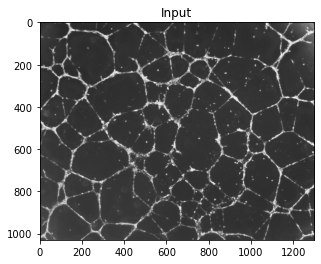

In [9]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
# Opening the image and converting it to grayscale.
a = Image.open('../Figures/endothelium.png').convert('LA')
imgplot = plt.title('Input')
imgplot = plt.imshow(a)

### 7.5.4 Ideal Highpass Filter

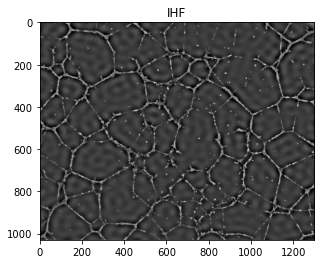

In [18]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
# Opening the image and converting it to grayscale
a = Image.open('../Figures/endothelium.png').convert('L')
# Performing FFT.
b = fftim.fft2(a)
# shifting the Fourier frequency image
c = fftim.fftshift(b)
# intializing variables for convolution function
M = c.shape[0]
N = c.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 25.0 # cut-off radius
# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
con = c * H
# Computing the magnitude of the inverse FFT.
d = abs(fftim.ifft2(con))
imgplot = plt.title('IHF')
imgplot = plt.imshow(d,cmap='gray')

### 7.5.5 Butterworth Highpass Filter

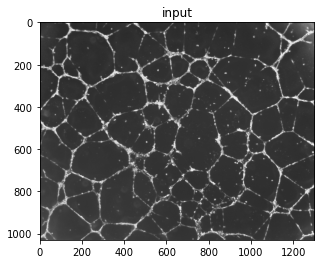

In [11]:
import cv2
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from PIL import Image
# Opening the image.
a = cv2.imread('../Figures/endothelium.png')
# Converting the image to grayscale.
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1
# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1/(1 + (r/d_0)**t2)
# Converting H to an image.
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(fftim.ifft2(con))
imgplot = plt.title('input')
imgplot = plt.imshow(a,cmap='gray')

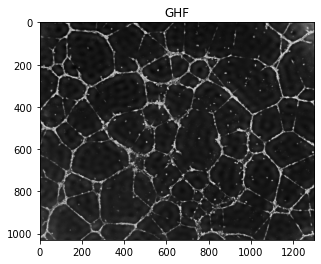

In [12]:
imgplot = plt.title('GHF')
imgplot = plt.imshow(e,cmap='gray')

### 7.5.6 Gaussian Highpass Filter

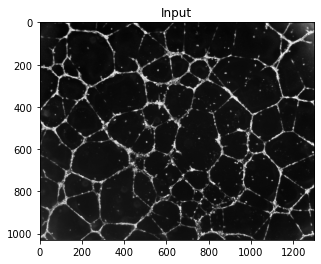

In [13]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image

# Opening the image and converting it to grayscale.
a = Image.open('../Figures/endothelium.png').convert('L')
# Performing FFT.
b = fftim.fft2(a)
# Shifting the Fourier frequency image.
c = fftim.fftshift(b)
# Intializing variables for convolution function.
M = c.shape[0]
N = c.shape[1]
# H is defined and values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1 - math.exp(-r**2/t1**2)
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = c * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Show
imgplot = plt.title('Input')
imgplot = plt.imshow(a,cmap='gray')

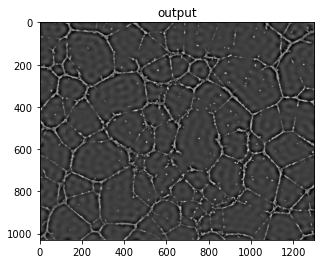

In [14]:
# Show
imgplot = plt.title('output')
imgplot = plt.imshow(e,cmap='gray')

### 7.5.7 Bandpass Filter

#### A bandpass filter, as the name indicates, allows frequency from a band or range of values. All the frequencies from outside the band are set to zero. Similar to the lowpass and highpass filters, bandpass filters can be Ideal, Butterworth or Gaussian.

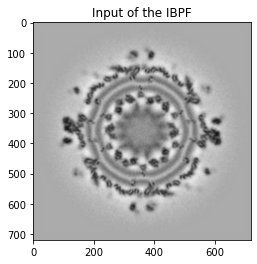

In [15]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('LA')
# Show
imgplot = plt.title('Input of the IBPF')
imgplot = plt.imshow(b)

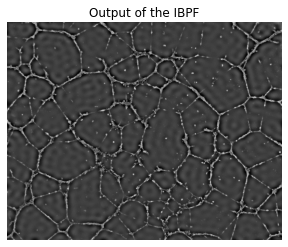

In [17]:
b = Image.open('../Figures/fft1.png').convert('LA')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 25.0 # minimum cut-off radius
d_1 = 32.0 # maximum cut-off radius
# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
# the band or annulus.
    if r > d_0 and r < d_1:
        H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Show
imgplot = plt.axis('off')
imgplot = plt.title('Output of the IBPF')
imgplot = plt.imshow(e,cmap='gray')